In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import kagglehub
import pandas as pd
import os
path1 = kagglehub.dataset_download("ayoubjadouli/morocco-wildfire-predictions-2010-2022-ml-dataset") #Dataset จาก Jadouli, A. (2023). *Morocco Wildfire Predictions (2010-2022) ML Dataset* [Data set]. Kaggle. https://www.kaggle.com/datasets/ayoubjadouli/morocco-wildfire-predictions-2010-2022-ml-dataset
file_path = os.path.join(path1, 'Date_final_dataset_balanced_float32.parquet')
df = pd.read_parquet(file_path)
df = df.head(3000)

In [11]:
df = df[['latitude','longitude','NDVI','average_temperature_lag_1', 'precipitation_lag_1','dew_point_lag_1','wind_speed_lag_1','is_fire','acq_date']].rename(columns={
    'average_temperature_lag_1': 'Temperature',
    'precipitation_lag_1': 'Precipitation',
    'dew_point_lag_1': 'Humidity',
    'wind_speed_lag_1': 'Windspeed',
    'acq_date': 'Date'})
df["Temperature"] = (df["Temperature"] - 32) * 5.0/9.0
df.rename(columns={"Temperature": "Temperature"}, inplace=True)

In [12]:
features = ['Temperature', 'Humidity', 'Windspeed', 'Precipitation']
X = df[features]
y = df['is_fire']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_fwi = RandomForestClassifier(n_estimators=100, random_state=42)
model_fwi.fit(X_train, y_train)

y_pred = model_fwi.predict(X_test)

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.6683333333333333
F1 Score: 0.6875981161695447


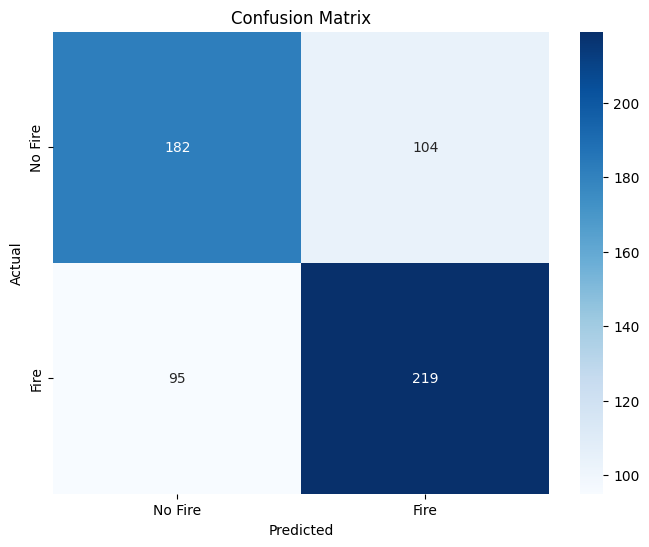

In [15]:
# prompt: Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
